# Fourier expansion

## Plot of the fourier expansion for the triangle wave function
We can see the plot of the triangle wave function with parameter $V_{min}$, $V_{max}$ and T

In [3]:
import numpy as np
import matplotlib.pyplot as plt

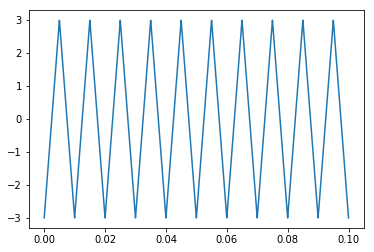

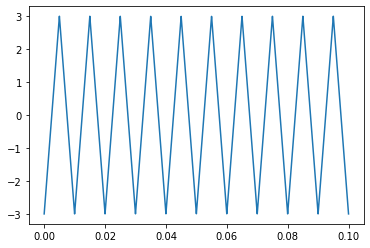

In [13]:

x = np.linspace(0,0.1,10000)


V_max = 3 #V
V_min = -3 #V
T = 0.01 #s
f = 1/T #Hz

u = np.ones(10000)*(V_max +V_min)/2

for i in range(1,100):
    u -= 4*(V_max-V_min)*np.cos((2*i-1)*2*np.pi*f*x)/(np.pi*(2*i-1))**2 

#fig = go.Figure(data=go.Scatter(x=x,y=u,name="Triangle Function"))
#fig.update_layout(title={'text': 'Triangle fourier expansion'})
#fig.show(rendered="jupyterlab")
    
plt.plot(x,u)
plt.show()

## Non linear transformation of the upper determined fourier expansion
The purpose here is to  smoothen the tooth of the triangle wave function with a non linear function 

$$h(x) = \dfrac{x}{\sqrt{\left(\dfrac{x}{s}\right)^2 + 1}}$$

therefore we evaluate the taylor expansion, around 0, of order 3 of $h(x)$
$$h(x) = x - \dfrac{x^3}{2s^2}$$

In order to have a smooth trigonometric function as output we can modify the coefficient s. Empirically we found the ratio $\dfrac{V_{max}}{s}=0.835$ which produce a nice curve for a signal without any dc component.

Below we apply h on the series expansion evaluated above

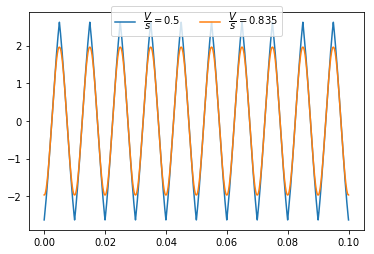

In [66]:
s = 6 #Without dc component the ratio (V_max - V_min)/s = 1.67 ou V_max/s = 1.67/2

x_2 = np.linspace(-1,1,1000)

h = lambda x : x - x**3/(2*s**2)
l = lambda x : x /np.sqrt((x/s)**2 + 1)
h2 = lambda x : x - x**3/(2*(3.6)**2)

#fig = go.Figure(data=[go.Scatter(x=x_2,y=l(x_2), name="$y=\dfrac{x}{\sqrt{(\dfrac{x}{"+str(s)+"})^2 +1}}$"), go.Scatter(x=x_2,y=h(x_2),name="taylor expansion")])
#fig.show(rendered="jupyterlab")


plt.plot(x,h(u), label = "$\dfrac{V}{s} = 0.5$")
plt.plot(x,h2(u),label= "$\dfrac{V}{s} = 0.835$")
#plt.plot(x_2,l(x_2), label = "$h(x)$")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),ncol=2, fancybox=True)
plt.savefig(fname = "SComparison.pdf",format="pdf")
plt.show()